# Step 1: Creating Tokens

In [1]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read() #storing the content form verdict.txt file

print("total number of characters: ", len(raw_text))
print(raw_text[:99]) #prints the first 100 characters of the file

total number of characters:  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


our goal is to convert the 20479 characters into individual words and that we can turn into embeddigs for LLM training.


now the question is how can we best split this text to obtain a list of tokens?
for this we will use python's regular expression library and then split the text based on the white space or punctuations into individual tokens.

In [2]:
import re

text = "Hello, world. This, is a test."
result= re.split(r'(\s)', text) #splits wherever whitespaces are encountered.

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


from the above code we can see that the result is a list of individual words, whitespaces, and punctuations. Now lets modify the regular expression such that it splits on whitespaces (\s) and commas, and period.

In [3]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


 a small issue that we encounter here is that the list still includes the whitespace characters. we have to remove them , which is as follows.

In [4]:
result = [item for item in result if item.strip()] #scans each item in the result and removes whitespace
#item.strip() will only return true if there is a word or punctuation else return false and it will not print
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


REMOVING WHITESPACES OR NOT?

When developing a simple tokenizer , whether we should encode whitespaces as separate characters or just remove them depends on our application and its requirements. 

Advantages of removing white spaces is that it reduces the memory and computing requirements. However keeping them can be useful if we train models that are sensitive to the exact structure of the text. (for example , python code , which is sensitive to indentation and spacing)

The tokenization scheme that we have used above is well enough but the input text can contain various other things such as question marks, quotation marks , double -dashes etc so we will again modify the splitting criteria based on the nature of this dataset.

In [5]:
text = "Hello, world!. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)

result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '!', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [6]:
#strip whitespace from each item and then filter out any empty string

result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '!', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [7]:
text = "Hello, world!. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)

result = [item.strip() for item in result if item.strip()] 
#the first item.strip() checks for whitespaces at the beginning of the sentence.
print(result)

['Hello', ',', 'world', '!', '.', 'Is', 'this', '--', 'a', 'test', '?']


### Now let's apply this tokenizer to the our raw data.

apply this tokenizer to or data and then store it to a variable named preprocessed.

In [8]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [9]:
print(len(preprocessed)) #this prints the length of the entire preprocessed token.

4690


we have successully tokenized the entire dataset that we had and now we proceed to the second step where we assign ids to the tokens because machines cannot understand the tokens directly we have to assign IDs to the tokens.

# Step 2: Creating Token IDs

in this step we will sort the tokens in the preprocessed variable in alphabetical order and then determine the vocabulary size.

In [10]:
all_words = sorted(set(preprocessed))  #converting it into a set and then sorting in the set
vocab_size = len(all_words)

print(vocab_size)

1130


here the number is less as compared to the tokens because the vocab size is the count of only the unique toekns that are present in the preprocessed variable.


now assigning this to vocabulary where vocabulary is like a dictionary of tokens and their associated token IDs.

In [11]:
vocab = {token:integer for integer, token in enumerate(all_words)}
#this will assign integer to each and every unique token.

In [12]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i>=50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [13]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s, i in vocab.items()} #needed for the decoder part to convert num to token

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed] #converting tokens into token IDs.
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids]) #using reverse dictionary to convert token IDs to tokens
        #replace spaces before specified punctuations , so  that it makes a perfect sentence.
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [14]:
#trying th etokenizer class that we have created by taking a sub part of the dataset for testing
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
            Mrs. Gisburn said with pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


our tokenizer has converted the tokens into token IDs now let's test our decoeder whethter it can convert the token IDs back to tokens.

In [15]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

from the above result we can see that we have successfully converted the tokens to token IDs and tokenIDs back to tokens from the subset of the training data. Now let's move further with it. What if we provide it with a sentence which is not present in the dataset?


In [16]:
#testing it with some words which are not present in the already available dataset.

text = "Hello , do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

we get an error for the above sentence because we don't have the word Hello in our dataset and from this we get to know that we need to consider large and diverse training sets to exxtend the vocabulary when working on LLMs.

# Adding Special Context Tokens

in the previous section we have implemented a simple tokenizer and which when tested to tokenize a word which was not present in the trainig data it gave an error. So in this section we will modify the tokenizer to handle unknown words. I particular, we will modify the vocabulary and tokenizer we implemented in the previous section, here we will implement the version 2 of SimpleTokenizer to handle the unknown tokens.

we can modify the tokenizer to use an <|unk|> token if it encounters a word that is not a part of the voocabulary. Furhtermore we add a token between unrelated tasks. 
For example , when training GPT-like LLMs multiple independent documents or books, it is common to insert a token before each document or book that follows a previous text source.


modifying the vocabulary to include these two special tokens , <|endoftext|> and <|unk|> to the existing vocabulary. Previously the size of the vocabulary was 1130 and after addding this two tokens it would increase and become 1132.

In [17]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer, token in enumerate(all_tokens)}

In [18]:
len(vocab.items())

1132

In [19]:
#for checking our modification we are printing the last 5 entries of the vocabulary.
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [20]:
#now further we will extend the simple tokenizer class with this.

class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s, i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed #scans the entire text and if comes across unknown word 
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        #replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [21]:
tokenizer = SimpleTokenizerV2(vocab)

text1= "Hello, do you like tea?"
text2= "In the sunlit terraces of the palace."

text = "<|endoftext|>".join((text1, text2))
print(text)

Hello, do you like tea?<|endoftext|>In the sunlit terraces of the palace.


In [22]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1131, 988, 956, 984, 722, 988, 1131, 7]

from the above results we can see that since hello was not present in our vocabulary it printed the token id of unk and for the endoftext also it did the same thing.

In [23]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|unk|> the sunlit terraces of the <|unk|>.'

based on the above detokenized words we can see that two words "Hello" and "palace" were not present in our vocabulary it were replaced with <|unk|> in the decoder part.

apart from this two tokens we also have other tokens which people use like 
1. [BOS] beginning of sequence - it marks the starting of the text. it signifies to the LLM where a piece of content begins.
2. [EOS] end of sequence - it is positioned at the end of the text and is useful when concatenating multiple unrelated text.
3. [PAD] padding - when training LLMs with batch sizes larger than one, the batch might contain texts of varying length . To ensure all texts have the same length the shorter texts are padded using the [PAD] token , up to the length of the longest text in the batch.

# Byte-Pair Encoding

byte pair encoding is used in GPT-2 and GPT-3 and the original model.


since implementing BPE is complicated we will be using an  existing python open-source library called tiktoken. OpenAI themselves use this library to convert the raw text into tokens.

In [24]:
import importlib
import tiktoken

print("Tiktoken version: ", importlib.metadata.version("tiktoken"))

Tiktoken version:  0.12.0


In [25]:
tokenizer = tiktoken.get_encoding("gpt2")

the usage of the above tokenizer is similar to what we have developed in the above setion named the simpletoeknizerv1 and simpletokenizerv2 .  but here the entire thing is done in a single line of code.

In [26]:
#lets see the working of this using a simple example
text = (
    "Hello, do you like tea? <|endoftext|> In the sunnlit terraces"
    "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 77, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [27]:
#now we can convert this token ids back into words using the decode method .
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunnlit terracesof someunknownPlace.


# Creating Input-Target Pairs

in this section we are going to implement a data loader that fetches the input-target pairs using a sliding window approach. 

to get started, we will first tokenize the whole The Verdict short story(the dataset we have been using for the earlier training.) we worked with earlier using the BPE tokenization.

In [28]:
with open("the-verdict.txt", "r", encoding="utf-8") as f: #reads the entire dataset
    raw_text = f.read()  #stores it in variable named raw_text

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


the above output shows that there are total of 5145 encoded tokens , voacbulary size is 5145 in the training set after applying the BPE tokenizer.

now we will see the first 50 tokens from the dataset for demonstration as it results in a slightly more interesting text passage in the further steps. 

In [29]:
enc_sample = enc_text[50:]

Now one of the most easiest way to create input-target pairs for the nextword prediction task is to create two variables, x and y , where x contains input tokens and y contains the targets, which are the inputs shifted by 1: 

the context size determines how many tokens are included in the input.

In [30]:
context_size = 4 #length of the input
# The context_size of 4 menas that the model is trained to look at a sequence of 
# 4 words (or tokens ) to predict the next word in the sequence.
# the input X is the first 4 tokens [1,2,3,4] and the target y is the next 4 tokens
#[2,3,4,5]

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


processing the inputs along with the targets, which are the inputs shifted by one position, we can then create the next-word prediction tasks as follows:

In [31]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


everything on the left of the arrow (---->) refers to the input an LLM would receive, and the token ID on the right side of the arrow represent what the LLM is supposed to predict.

for demonstration purposes, let's repeat the previous code but convert the token IDs into text:

In [32]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


we have now created input-target pairs that we can turn into use for the LLM training in the further chapters.

now there's only one more task before we can turn the tokens into embeddings: implementing an efficient data loader that iterates over the dataset and returns the inputs and targets as PyTorch tensors, which can be thought of as multidimensional arrays.

in particular, we are interested in returning two tensors: an input tensor containing the text that the LLM sees and a target tensor that includes the targets for the LLm to predict

# Implementing a Data Loader

for a efficient data loader implementation, we will use pytorch's built-in dataset and data Loader classes.

Setps for the same :
1. Tokenize the entire text
2. use a sliding window to chunk the book into overlapping sequences of max_length
3. return the total number of rows in the dataset
4. return a single row from the dataset.

In [33]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self,txt, tokenizer, max_length,stride):
        self.input_ids = []
        self.target_ids = []

        #tokenize the entire text
        token_ids = tokenizer.encode(text, allowed_special = {"<|endoftext|>"})

        #use a sliding window to chunk the book into overlapping sequences of max_length 
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i+1: i+ max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))


    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

the gptDatasetV1 class in listing 2.5 is based on the pytorch dataset class.
it defines how individual rows are fetched from the dataset. Each row consists of a number of token IDs (based on max_length) assigned to an input_chunk tensor. 
the target_chunk tensor contains the corresponding targets.


Since our data is ready we will feed this data into the data loader. we will write a code that will use the GPTDatasetV1 to load the inputs in batches via a PyTorch DataLoader.

Below are the steps for the same:
1. initialize the tokenizer
2. create dataset
3. drop_last = True drops the last bacth if it is shorter than the specified batch_size to prevent loss_spikes  during training.
4. the number of CPU processes to use for preprocessing

In [34]:
def create_dataloader_v1(
    txt,                    # raw training corpus as a single string
    batch_size=4,            # how many sequences per batch
    max_length=256,          # length (in tokens) of each training sample
    stride=128,              # overlap between consecutive windows (controls data augmentation)
    shuffle=True,            # shuffle batches each epoch (improves generalization)
    drop_last=True,          # drop the last incomplete batch (keeps batch sizes uniform)
    num_workers=0            # DataLoader worker processes (0 = do work in main process; safe on Windows/Jupyter)
):
    """
    Builds a PyTorch DataLoader for next-token prediction from a long text.
    Splits `text` into overlapping token windows using `max_length` and `stride`.
    """

    # 1) Initialize the tokenizer (GPT-2’s Byte-Pair Encoding).
    #    This converts raw text into integer token IDs compatible with GPT-style models.
    tokenizer = tiktoken.get_encoding("gpt2")

    # 2) Create the dataset.
    #    GPTDatasetV1 should: 
    #      - tokenize `txt`
    #      - slice it into overlapping windows of length `max_length`
    #      - with step size `max_length - stride`
    #      - and return (input_ids, target_ids) pairs for next-token prediction.
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # 3) Wrap the dataset in a DataLoader to:
    #      - batch samples (`batch_size`)
    #      - optionally shuffle sample order each epoch (`shuffle`)
    #      - optionally drop the last partial batch (`drop_last`)
    #      - use `num_workers` background workers to speed up data loading
    #    Note: On Windows/Jupyter, keep `num_workers=0` to avoid multiprocessing issues.
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    # 4) Return an iterable that yields batches of tensors ready for training.
    return dataloader

now we are going to test the dataloader with a batch size of 1 for an LLM with a context size of 4,
this will develop an intuition of how the GPTDatasetV1 class and the create_dataloader_v1 function work together.

In [35]:
#this is the first step where we read the text

with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

converting the dataloader into a python iterator to fetch the next entry via python's built-in next() function

In [36]:
import torch 
print("Pytorch version: ", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

Pytorch version:  2.9.0+cpu
[tensor([[15496,    11,   466,   345]]), tensor([[ 11, 466, 345, 588]])]


here the first_batch variable contains two tensors: the first tensor stores the input token IDs, and the second tensor stores the target token IDs. Since the max_length is set to 4, each of the two tensors contains 4 token IDs.

the input size of 4 is relatively small and only chosen for illustration purposes. it is common to train LLMs with input sizes of at least 256.


to illustrate the menaing of stride=1, let's fetch another batch from this dataset.

In [37]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 11, 466, 345, 588]]), tensor([[ 466,  345,  588, 8887]])]


it is called as sliding window approach because here we can see that during the second iteration the ones which were present in the output/ target tensor are now inputs during the second iteration.

batch sizes of 1, such as we have sampled from the data loader so far, are useful for illustration purposes. We know that in deep learning, a small batch sizes require less memory during training but lead to more noisy model updates.

In regular deep learning, the batch size is a trade-off and hyperparameter to experiment with when training LLMs.

before moving on to the two final sections of this chapter that we focused on creating embedding vectors from the tokenIDs , let's let us see how we can use the data loader to sample with a batch size greater than 1:

In [38]:
dataloader = create_dataloader_v1(raw_text,
                                  batch_size=8,
                                  max_length=4,
                                  stride=4,     # see note below
                                  shuffle=False,
                                  drop_last=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[15496,    11,   466,   345],
        [  588,  8887,    30,   220],
        [50256,   554,   262,  4252],
        [   77, 18250,  8812,  2114],
        [ 1659,   617, 34680, 27271]])

Targets:
 tensor([[   11,   466,   345,   588],
        [ 8887,    30,   220, 50256],
        [  554,   262,  4252,    77],
        [18250,  8812,  2114,  1659],
        [  617, 34680, 27271,    13]])


NOTE: now that we increase the stride to 4. This is to utilize the data set fully (we don't skip a single word) but also avoid any overlap between the batches, as the overlap could lead to increased overfitting.

# Token Embedding

Let us see how the token ID to embedding vector conversion works with a hands-on example. We have four input tokens 

In [39]:
input_ids = torch.tensor([2,3,5,1])

for the sake of simplicity we are going to use small vocabulary of only 6 words(instead of 50,257 words in the BPE tokenizer vocabulary) and we want to create embeddings of size 3 (in GPT-3, the embedding size is 12,288 dimensions):

In [40]:
vocab_size=6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

embedding is a simple lookup table that stores embeddings of a fixed dictionary and size. and this intialize the weights of the embedding matrix in a random manner. here we will have the embedding matrix of 6 rows and 3 columns.

In [41]:
#the print statement in the code prints the embedding layer's underlyingg weight matrix:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


the above are the initial weights in the embedding layer and it contains small and random values. and these are the values that are optimized during LLM training as a part of the LLM optimization itself. 

In [42]:
print(embedding_layer(torch.tensor([3]))) #fetches the vector embedding for ID 3.

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


If we look at the embedding vector for **token ID 3**, it’s exactly the same as the **4th row** in the embedding matrix (because Python counts from zero).

This means that the **embedding layer** basically works like a **lookup table** — it just picks the correct row (vector) from its weight matrix based on the **token’s ID**.


In [43]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


Each row in this output matrix is obtained via a lookup operation from the embedding weight matrix.

# Positional Embeddings (Encoding word positions)

previously we focused on very small embedding sizes in this chapter for illustration purposes. We now consider more realistic and usefule mebedding sizes and encode the input toens into a 256-dimensional vector representations. This is smaller than what the original GPT-3 model used in (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable for experimentation.
we assume, the token IDs were created by the BPE tokenizer that we implemented earlier, which has a vocabulary size of 50,257.

In [44]:
vocab_size = 50257
output_dim = 256 #vector size

token_embedding_layer = torch.nn.Embedding(vocab_size,  output_dim)

using the token_embedding_layer above, if we sample data from the data loader, we embed each token in each batch into a 256 - dimensional vector. If we have a batch_size of 8 with four tokens each, the result will be an 8 X 4 X 256 tensor.

here 8 represents the batch-size and 4 represents the context size which means that the maximum input length is 4(at most 4 tokens can be passed as input). In short here the parameters would be updated after every 8 batches.

Let's instantiate the data loader ( data sampling with a sliding window), first:

In [45]:
max_length = 4
# Maximum sequence length (number of tokens per training example).
# With next-token prediction, each input chunk will be length 4.

dataloader = create_dataloader_v1(
    raw_text,            # The full corpus (string or token IDs) to turn into batches
    batch_size=8,        # How many sequences per batch
    max_length=max_length,  # Truncate/window each sequence to 4 tokens
    stride=1,   # Move the window by 4 each time → non-overlapping chunks
    shuffle=False        # Keep chunk order deterministic (useful for debugging)
)

data_iter = iter(dataloader)
# Create a Python iterator over the DataLoader so we can pull batches manually.

inputs, targets = next(data_iter)
# Grab the first batch.
# inputs:  [batch_size, max_length] token IDs used as model input.
# targets: [batch_size, max_length] token IDs shifted by one step (next-token labels).
# (I.e., for language modeling: model predicts targets[t] from inputs[t].)

In [46]:
print("Token IDs : \n", inputs)
print("\n Inputs shape :\n", inputs.shape)

Token IDs : 
 tensor([[15496,    11,   466,   345],
        [   11,   466,   345,   588],
        [  466,   345,   588,  8887],
        [  345,   588,  8887,    30],
        [  588,  8887,    30,   220],
        [ 8887,    30,   220, 50256],
        [   30,   220, 50256,   554],
        [  220, 50256,   554,   262]])

 Inputs shape :
 torch.Size([8, 4])


above are the token ids for the input that we have received , now what we have to do is for each of the token ids we have to convert each of this into a 256 dimensional vector representation. I have adjusted the stride due to an error that i was encountering . 


As we can see, the token ID tensor is 8X4 dimensional, menaing that the data batch consists of 8 text samples with 4 tokens each.

in the below cell we would be passing this input tokens to the embedding layer to embed these token IDs into a 256-dimensional vectors: The lookup table generates the 256 dimensional vectors for each of the token ids passed on to it.

In [47]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [48]:
#creating an embedding layer for the positional encoding and based on that we will encode the token ids

context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [49]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


in the above line of code , the input to the pos_embeddings is usually a placeholder vector torch.arange(context_length), a sequence of numbers 0,1,.., up to the maximum input length - 1.

the context_length is a variable that represents the supported input size of the LLM.

Here, we choose it similar to the maximum length of the input text.

In practice, input text can be longer than the supported context length, in which case we have to truncate.

As we can see that the positional embedding tensor consists of four 256-dimensional vectors. we can now add these directly to the token embeddings , where Pytorch will add the 4 X 256 dimensional pos_embeddings tensor to each 4X256 dimensional token embedding.

## Implementing a simplified attention mechanism

consider the following input sentence, which has already been embedded into 3- dimensional vectors. we choose a small embedding dimension for illustration purposes to ensure it fits on the page without line breaks.

In [60]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

the above are the vector emebeddings for the words which captures the semantic meaning of each of the word with each other.
below we are plotting the 3d graph and through that we can see the meaning of the above lines of code.

C:\Users\hetpa\AppData\Local\Temp\ipykernel_29508\1582536587.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')                    # distinct, human-friendly colors


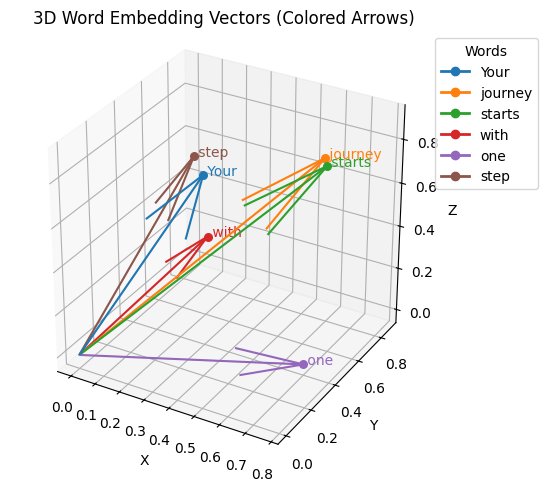

In [51]:
# Plot 3D word embedding VECTORS with distinct colors (minimal changes)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (enables 3D)
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D

# Words (must match number of rows in `inputs`)
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Grab first 3 dims from your embedding tensor `inputs`
# (If on GPU, .cpu() brings it to host; .detach() removes grad)
x_coords = inputs[:, 0].detach().cpu().numpy()
y_coords = inputs[:, 1].detach().cpu().numpy()
z_coords = inputs[:, 2].detach().cpu().numpy()

# Choose a qualitative colormap and assign a different color per vector
cmap = get_cmap('tab10')                    # distinct, human-friendly colors
N = len(words)
colors = [cmap(i % 10) for i in range(N)]   # cycle if more than 10 vectors

# Create 3D figure/axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each vector as an arrow from origin with its own color
for i, (x, y, z, w) in enumerate(zip(x_coords, y_coords, z_coords, words)):
    c = colors[i]
    ax.quiver(0, 0, 0, x, y, z, length=1.0, normalize=False, color=c)  # arrow
    ax.scatter([x], [y], [z], s=30, color=c)                           # endpoint
    ax.text(x, y, z, f" {w}", fontsize=10, color=c)                    # label

# (Optional) thin gray guide lines from origin to points
for x, y, z in zip(x_coords, y_coords, z_coords):
    ax.plot([0, x], [0, y], [0, z], linewidth=1, color=(0.6, 0.6, 0.6, 0.4))

# Legend mapping colors to words (proxy line+marker handles)
legend_handles = [Line2D([0], [0], color=colors[i], lw=2, marker='o', label=words[i])
                  for i in range(N)]
ax.legend(handles=legend_handles, title="Words", loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Axes labels/title and aspect
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Word Embedding Vectors (Colored Arrows)')

try:
    ax.set_box_aspect([1, 1, 1])  # keep proportions equal (Matplotlib 3.3+)
except Exception:
    pass

plt.tight_layout()
plt.show()

here each row reperesents a word, and each column represents an embedding dimension. The second input token serves as the query

In [52]:
query = inputs[1]  #because python has zero indexing #2nd input token  is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)  #dot product (transpose is not necessary)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


from the output of the above lines of code we can see that the dot product is highest with the second word itself and it is followed with the third word and then the last word. the same thing can be seen from the graph that we have plotted for the embedding vectors of the words.

In the next step, we will normalize each of the attention scores that we computed previously.

the main goal behind the normalization is to obtain attention weights that sum up to 1.
this normalization is a convention that is useful for interpretation and for maintaining training stability in an LLM.

below is the straightforward method for achieving this normalization step:


In [53]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("attention weights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

attention weights:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


in the above cell what we have done is firstly we calculated the sum of all the attention scores and then divided each of the score with the sum that we got to get the attention  weight and this is the simplest way of normalizing the attention scores.


the above approach to normalize the attention scores cannot we used during production instead of the above approach we can use softmax function for normalization. It is better approach when it comes to managing extreme values and offers more favourable gradient properties. Below is the basic implementation of the softmax function for normalizing the attention scores: 

In [54]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0) #dim=0 ensures that the whole row is taken for sum.
#dim=0 ensures that all the entries in the row are counted during summation.
attn_weights_2_naive = softmax_naive(attn_scores_2)

print("attention weights : ", attn_weights_2_naive)
print("sum: ", attn_weights_2_naive.sum())

attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum:  tensor(1.)


the output shows, the softmax function also meets the objective and normalizes the attention weights such that they sum to 1:

in addition softmax function ensures that the attention weights are always positive. This makes the output interpretable as probablities or relative importance, where higher weights indicate greater importance. 

the naive softmax that we have implemented may encounter numerical stability problems, such as overflow and underflow, when dealing with large or small input values.


therefor in practice, it is advisable to use pytorch implementation of softmax, which has been extensively optimized for performance:

In [55]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights : ", attn_weights_2)
print("Sum : ", attn_weights_2.sum())

Attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum :  tensor(1.)


The context vector z(2)is calculated as a weighted sum of all input vectors.

This involves multiplying each input vector by its corresponding attention weight:

In [56]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


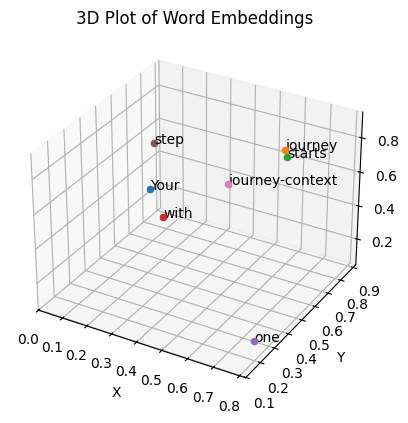

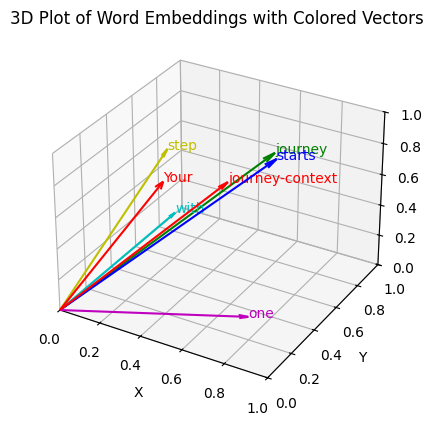

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

now we can extend this computation to calucalte the attention weights and ontext vectors for all inputs.

First, we add an additional for-loop to compute the dot products for all pairs of inputs.

In [61]:
# Get number of tokens/rows
n = len(inputs) if isinstance(inputs, list) else inputs.shape[0]

# Allocate correctly-sized score matrix
attn_scores = torch.empty(n, n)

# Fill it
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i.view(-1), x_j.view(-1))  # ensure 1D

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


Each element in the preceding tensor represents an attention score between each pair of inputs. When computing the preceding attention score tensor, we used for-loops in Python. However, for-loops are generally slow, and we can achieve the same results using matrix multiplication:

In [62]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


we now normalize each row so that the values in each row sum to 1:

In [63]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In the context of using PyTorch, the dim parameter in functions like torch.softmax specifies the dimension of the input tensor along which the function will be computed.

By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.

If attn_scores is a 2D tensor (for example, with a shape of [rows, columns]), dim=-1 will normalize across the columns so that the values in each row (summing over the column dimension) sum up to 1.

we now use these attention weights to compute all context vectors via matrix multiplication:

In [64]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


## Implementing Self attention with trainable weights

In [65]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

now we are defining a few variables:

1. #A the second input element
2. #B the input embedding size, d=3
3. #C the output embedding size, d_out=2


NOTE: in GPT like models, the input and output dimensions are usually the same.
but here for illustration purposes, we choose different input and output 

In [66]:
x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

In [67]:
#initializing the three weight matrices Wq, Wk, and Wv

torch.manual_seed(123)
# Define the weight matrices for Query, Key, and Value transformations
# Each is a learnable parameter tensor of shape [d_in, d_out]
# d_in  → input embedding dimension (size of each token vector)
# d_out → projected dimension used for attention computations

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
# This matrix transforms the input embeddings into Query vectors.
# Each query represents "what this token is looking for" in other tokens.

W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
# This matrix transforms the input embeddings into Key vectors.
# Each key represents "what this token offers" in terms of information.

W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
# This matrix transforms the input embeddings into Value vectors.
# Each value contains the actual content or information to be aggregated
# after attention scores are calculated.

# Setting requires_grad = False means these parameters won’t be updated
# during backpropagation — useful here if you’re just demonstrating or
# manually computing attention instead of training the model.

In [69]:
#Printing the trainable weight matrices
print("W_query: ",W_query)
print("W_key: ",W_key)
print("W_value: ",W_value)

W_query:  Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
W_key:  Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
W_value:  Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


currently we have the requires_grad as False because we are not going to update this weight matrices but when we plan to use this weight matrices for model training, we would need to set this parameter as True to update these matrices during backpropagation.

in the below cell we are going to compute the query, key and value vectors.

the tensor will only show the output for a single second row because here we are only using the second row elements from the input vector.

In [70]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


the result of the above query vector is a 2-dimensional vector because we set the number of columns of the corresponding weight matrix, via d_out, to 2:

Even though our temporary goal is to only compute the one context vector z(2), we still require the key and value vectors for all input elements.

This is because they are involved in computing the attention weights with respect to the query q(2)

We can obtain all keys and values via matrix multiplication:

In [72]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:

first let's compute the attention score ω22.

In [73]:
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


Again we can generalize this computation to all attention scores via matrix multiplication:

In [ ]:
attn_scores_2 = query_2 @ keys.T #

In [74]:
attn_scores_2 = query_2 @ keys.T #All attention scores for given query 
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


the above results shows the attention scores of the word journey with respect to other words that were present in the input like "Your, Journey, Starts, with, one , step".

we compute the attention weights by scaling the attention scores and using the softmax function we used earlier. The difference to earlier is that we now scale the attention scores by dividing them by the square root of the embedding dimension of the keys.

Note that taking the square root is mathematically the same as exponentiating by 0.5:

In [79]:
# d_k: dimensionality of each key vector (the last axis of `keys`)
d_k = keys.shape[-1]

# Scale the raw attention scores by sqrt(d_k) to keep logits in a stable range,
# then apply softmax across the last dimension so each row becomes a probability
# distribution over keys (weights sum to 1 per query).
attn_weights_2 = torch.softmax(attn_scores_2 / (d_k ** 0.5), dim=-1)

# View the normalized attention weights (one distribution per query token)
print(attn_weights_2)

# Print the key dimension used for the scaling factor
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


## Why do we divide by Square root of the dimension ?

In [80]:
import torch 

#Define the tensor 
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

#Applying softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling: ", softmax_result)

#Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor * 8) : ", softmax_scaled_result)

Softmax without scaling:  tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor * 8) :  tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


In [82]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


above we have only calculated a single context vector z(2).

## Implementing a compact self attention python class

In [83]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in , d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))


    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T #omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec =  attn_weights @ values
        return context_vec

In this PyTorch code, SelfAttention_v1 is a class derived from nn.Module, which is a fundamental building block of PyTorch models, which provides necessary functionalities for model layer creation and management.

The init method initializes trainable weight matrices (W_query, W_key, and W_value) for queries, keys, and values, each transforming the input dimension d_in to an output dimension d_out.

During the forward pass, using the forward method, we compute the attention scores (attn_scores) by multiplying queries and keys, normalizing these scores using softmax.

Finally, we create a context vector by weighting the values with these normalized attention scores.

In [84]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


Since inputs contains six embedding vectors, we get a matrix storing the six context vectors, as shown in the above result.

As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of context_vec_2 in the previous section.

We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's nn.Linear layers, which effectively perform matrix multiplication when the bias units are disabled.

Additionally, a significant advantage of using nn.Linear instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight initialization scheme, contributing to more stable and effective model training.

In [85]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

In [87]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


SelfAttention_v1 and SelfAttention_v2 give different outputs because they use different initial weights for the weight matrices since nn.Linear uses a more sophisticated weight initialization scheme.

## Hiding Future Words with Causal Attention

Let's work with the attention scores and weights from the previous section to code the causal attention mechanism.

Reuse the query and key weight matrices of the SelfAttention_v2 object from the previous section for convenience

In [88]:
queries = sa_v2.W_query(inputs) #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5 , dim=1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


now the above output shows the attention scores when used self attention , now for using causal attention what we need to do is that we will have to replace the upper triangle of the matrix with zeroes and the example for that can be seen in the cell below.

for this we will be using the tril function of pytorch which means the upper triangle in the matrix. torch.triu will result in zeroes in the upper traingle of the matrix. torch.tril will set all the elements above the diagonal to zero.

In [91]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


now what we can do is multiply this mask with the attention weights to zero out the values above the diagonal.

In [92]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


the above results shows that the elements above the diagonal are successfully zeroed out. but here one thing that we can notice is that the attention weights are not normalized meaning the sum of values in a single row is not equal to 1. We need to renormalize the attention weights to sum up to 1 again in each row. We can achieve this by dividing each element in each row by the sum in each row:

In [93]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


now here there are still some issue even after we zeroed the elements in the upper triangle of the matrix, the main aim of causal attention is to not have the influence of any future tokens, right? but here before zeroing out the entries in the upper traingle of the matrix we have already applied softmax to the values in the denominator it has the sum of exponential of all the weights, so even after zeroing out all the tokens it is not essentially cancelling the influence of the future tokens, because the future two tokens have influenced the initial two values and that is the biggest dis-advantage of this approach.


To solve this problem we can use another approach where we will replace the values in the upper triangle in the attention score matrix itself before we apply softmax to it.

the advantage of this approach is that when we apply softmax to this values it takes exponents and the exponents of the negative infinity equals to zero which helps to prevent the influence on the initial values and this will prevent from having a data leakage problem.

In [94]:
print(attn_scores)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)


In [95]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


Now, all we need to do is apply the softmax function to these masked results, and we are done.

In [96]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


As we can see based on the output, the values in each row sum to 1, and no further normalization is necessary.

Masking in Transformers sets scores for future tokens to a large negative value, making their influence in the softmax calculation effectively zero.

The softmax function then recalculates attention weights only among the unmasked tokens.

This process ensures no information leakage from masked tokens, focusing the model solely on the intended data.

We could now use the modified attention weights to compute the context vectors via context_vec = attn_weights @ values.

However, in the next section, we first cover another minor tweak to the causal attention mechanism that is useful for reducing overfitting when training LLMs.

## Masking additional attention weights using dropouts.

In [98]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #this is the probablity of values which will be dropped out 
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


When applying dropout to an attention weight matrix with a rate of 50%, half of the elements in the matrix are randomly set to zero.

To compensate for the reduction in active elements, the values of the remaining elements in the matrix are scaled up by a factor of 1/0.5 =2.

This scaling is crucial to maintain the overall balance of the attention weights, ensuring that the average influence of the attention mechanism remains consistent during both the training and inference phases.

Now, let's apply dropout to the attention weight matrix itself:

In [99]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


As we can see above, the resulting attention weight matrix now has additional elements zeroed out and the remaining ones rescaled.

Having gained an understanding of causal attention and dropout masking, we will develop a concise Python class in the following section.

This class is designed to facilitate the efficient application of these two techniques.

## Implementing a Compact causal attention class

we will now incorporate the causal attention and dropout modifications into the SelfAttention Python class we developed in section 3.4.

This class will then serve as a template for developing multi-head attention in the upcoming section.

Before we begin, one more thing is to ensure that the code can handle batches consisting of more than one input.

This will ensure that the CausalAttention class supports the batch outputs produced by the data loader we implemented earlier.

For simplicity, to simulate such batch inputs, we duplicate the input text example:

2 inputs with 6 tokens each, and each token has embedding dimension 3

In [100]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


This results in a 3D tensor consisting of 2 input texts with 6 tokens each, where each token is a 3-dimensional embedding vector.

The following CausalAttention class is similar to the SelfAttention class we implemented earlier, except that we now added the dropout and causal mask components as highlighted in the following code.

Step 1: Compared to the previous SelfAttention_v1 class, we added a dropout layer.

Step 2: The register_buffer call is also a new addition (more information is provided in the following text).

Step 3: We transpose dimensions 1 and 2, keeping the batch dimension at the first position (0).

Step 4: In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory copies

In [114]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

The use of register_buffer in PyTorch is not strictly necessary for all use cases but offers several advantages here.

For instance, when we use the CausalAttention class in our LLM, buffers are automatically moved to the appropriate device (CPU or GPU) along with our model, which will be relevant when training the LLM in future chapters.

This means we don't need to manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch errors.

We can use the CausalAttention class as follows, similar to SelfAttention previously:

In [115]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("Context_vecs.shape : ", context_vecs.shape)

Context_vecs.shape :  torch.Size([2, 6, 2])


In [116]:
print(context_vecs)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


## Extending single head attention to multi-head attention

implementing multi-head attention involves creating multiple instances of the self-attention mechanism, each with its own weights, and then combining their outputs.

we will be achieving this by implementing a simple MultiHeadAttentionWrapper class that stacks multiple instances of our previously implemented CausalAttention module:

In [120]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
            for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

the above line of code basically runs the causal attention class for the specified number of heads and then concatenates the result along the columns of those together to give the output as a single result.

For example, if we use this MultiHeadAttentionWrapper class with two attention heads (via num_heads=2) and CausalAttention output dimension d_out=2, this results in a 4- dimensional context vectors (d_out*num_heads=4).

implementing the inputs and the batch in the below code cell.

In [121]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [122]:
torch.manual_seed(123)
context_length = batch.shape[1] #This is the number of tokens
d_in, d_out = 3,2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads = 2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape : ", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape :  torch.Size([2, 6, 4])


the first dimension is for the batch so from the above output we can see that there are 2 batches, the second dimension is about the number of rows in each batch , here we have 2 batches with 6 rows in each context vector. We know that d_out is 2 so the output matrix should have 2 columns but here we have 4 because for each attention head we have 2 columns and in total we have 2 heads so the final output contains 4 columns instead of 2.

The above values are random values as we haven't used this for the training purposes.

The first dimension of the resulting context_vecs tensor is 2 since we have two input texts (the input texts are duplicated, which is why the context vectors are exactly the same for those).

The second dimension refers to the 6 tokens in each input. The third dimension refers to the 4-dimensional embedding of each token.

In this section, we implemented a MultiHeadAttentionWrapper that combined multiple single-head attention modules.
However, note that these are processed sequentially via [head(x) for head in self.heads] in the forward method.

We can improve this implementation by processing the heads in parallel.

One way to achieve this is by computing the outputs for all attention heads simultaneously via matrix multiplication, as we will explore in the next section.